In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# 讀取數據
df = pd.read_csv(r"C:\Users\brigh\train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
def outliers_z_score(x,times):  #定義一個函式，x是資料，times是 幾倍標準差，
    mean_x = np.mean(x) #
    stdev_x = np.std(x)
    z_scores = [(i - mean_x) / stdev_x for i in x]
    return np.where(np.abs(z_scores) > times) #np.abs是用來計算絕對值 
    #mp.where可以告訴你滿足條件的資料在哪裡

out_index=outliers_z_score(df['Age'],3)  #疑問:times的訂定?
print(df.loc[out_index[0],'Age'])  #告知"特定行"及"特定行對應的Age"

630    80.0
851    74.0
Name: Age, dtype: float64


C:\Users\brigh\AppData\Local\Temp\ipykernel_18472\1344836670.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, location)  #畫布位置


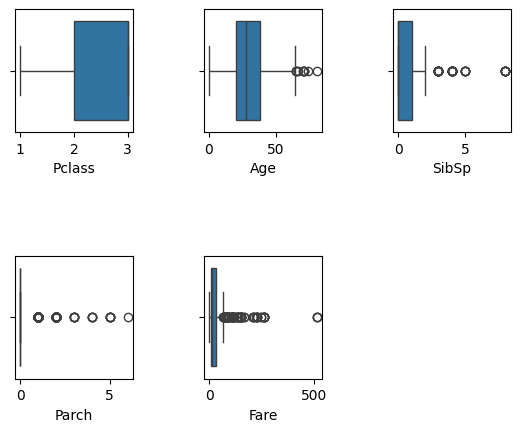

In [17]:
features=["Pclass","Age","SibSp","Parch","Fare"] #要觀察的特徵
fig , ax = plt.subplots() #創建一個包含單個子圖的圖形和軸
fig.subplots_adjust(hspace=1, wspace=0.6) #調整子圖之間的間距  h縱向 w橫向
location=1 
for i in features:
    plt.subplot(2, 3, location)  #畫布位置
    sns.boxplot(data=df,x=i) #盒鬚圖
    location+=1